# 2013 Data on Payments Made to Physicians

This data encompasses the Center for Medicare and Medicaid Services Open Payments program which requires payments that medical companies pay to physicians be reported. There are many legitimate reasons why medical companies would pay physicians. Medical companies pay physicians for consulting, for offering assistance in setting up research studies, and for their ideas on how to make their medical products better, among other things.

Well there may well be ethical dillemas introduced by these practices, it is worth keeping in mind that there could be nothing ethically or medically questionable with the physicians covered in this data set.


The 2013 data file can be downloaded [here](https://www.cms.gov/openpayments/explore-the-data/dataset-downloads.html). It is **not** included in the repository

## Initializing the dataset

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# datatypes that must be cast as strings
types = {'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_ID': 'str',
 'Charity_Indicator': 'str',
 'City_of_Travel': 'str',
 'Contextual_Information': 'str',
 'Country_of_Travel': 'str',
 'NDC_of_Associated_Covered_Drug_or_Biological1': 'str',
 'NDC_of_Associated_Covered_Drug_or_Biological2': 'str',
 'NDC_of_Associated_Covered_Drug_or_Biological3': 'str',
 'NDC_of_Associated_Covered_Drug_or_Biological4': 'str',
 'NDC_of_Associated_Covered_Drug_or_Biological5': 'str',
 'Name_of_Associated_Covered_Device_or_Medical_Supply1': 'str',
 'Name_of_Associated_Covered_Device_or_Medical_Supply2': 'str',
 'Name_of_Associated_Covered_Device_or_Medical_Supply3': 'str',
 'Name_of_Associated_Covered_Device_or_Medical_Supply4': 'str',
 'Name_of_Associated_Covered_Device_or_Medical_Supply5': 'str',
 'Name_of_Associated_Covered_Drug_or_Biological1': 'str',
 'Name_of_Associated_Covered_Drug_or_Biological2': 'str',
 'Name_of_Associated_Covered_Drug_or_Biological3': 'str',
 'Name_of_Associated_Covered_Drug_or_Biological4': 'str',
 'Name_of_Associated_Covered_Drug_or_Biological5': 'str',
 'Name_of_Third_Party_Entity_Receiving_Payment_or_Transfer_of_Value': 'str',
 'Physician_License_State_code2': 'str',
 'Physician_License_State_code3': 'str',
 'Physician_License_State_code4': 'str',
 'Physician_License_State_code5': 'str',
 'Physician_Name_Suffix': 'str',
 'Physician_Profile_ID': 'str',
 'Recipient_Postal_Code': 'str',
 'Recipient_Primary_Business_Street_Address_Line2': 'str',
 'Recipient_Province': 'str',
 'Recipient_Zip_Code': 'str',
 'Record_ID': 'str',
 'State_of_Travel': 'str',
 'Teaching_Hospital_ID': 'str',
 'Teaching_Hospital_Name': 'str',
 'Third_Party_Equals_Covered_Recipient_Indicator': 'str'}

In [3]:
# fast date conversion 
# credit: http://stackoverflow.com/questions/29882573/pandas-slow-date-conversion
def lookup(s):
    """
    This is an extremely fast approach to datetime parsing.
    For large data, the same dates are often repeated. Rather than
    re-parse these, we store all unique dates, parse them, and
    use a lookup to convert all dates.
    """
    dates = {date:pd.to_datetime(date) for date in s.unique()}
    return s.map(dates)

In [4]:
# read in the data
df = pd.read_csv(r'data_unzipped/payments_13/OP_DTL_GNRL_PGYR2013_P06302016.csv', dtype=types)
df.head()

,Change_Type,Covered_Recipient_Type,Teaching_Hospital_CCN,Teaching_Hospital_ID,Teaching_Hospital_Name,Physician_Profile_ID,Physician_First_Name,Physician_Middle_Name,Physician_Last_Name,Physician_Name_Suffix,...,NDC_of_Associated_Covered_Drug_or_Biological3,NDC_of_Associated_Covered_Drug_or_Biological4,NDC_of_Associated_Covered_Drug_or_Biological5,Name_of_Associated_Covered_Device_or_Medical_Supply1,Name_of_Associated_Covered_Device_or_Medical_Supply2,Name_of_Associated_Covered_Device_or_Medical_Supply3,Name_of_Associated_Covered_Device_or_Medical_Supply4,Name_of_Associated_Covered_Device_or_Medical_Supply5,Program_Year,Payment_Publication_Date
0,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,269814,CALVIN,J,KUBO,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,06/30/2016
1,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,180504,LEONARD,A,KUCHEMBA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,06/30/2016
2,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,180504,LEONARD,A,KUCHEMBA,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,06/30/2016
3,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,86548,RONALD,H,KURLANDER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,06/30/2016
4,UNCHANGED,Covered Recipient Physician,NaN,NaN,NaN,307584,HAROLD,M,KURLANDER,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,06/30/2016


In [5]:
# fast date conversion
df['Date_of_Payment'] = lookup(df['Date_of_Payment'])

## What was the total amount paid to physicians by medical companies in 2013?

In [13]:
"${:,}".format(df['Total_Amount_of_Payment_USDollars'].sum())

'$1,008,973,847.1398742'

### Over 1 Billion Dollars

## How much did the most well paid physicians make?

In [14]:
payment_sums = df.groupby('Physician_Profile_ID').agg({'Total_Amount_of_Payment_USDollars': 'sum'})
top_payments = payment_sums.sort_values('Total_Amount_of_Payment_USDollars', ascending=False)
top_payments.head()

,Total_Amount_of_Payment_USDollars
Physician_Profile_ID,
288926,7356359.12
1166415,6304848.44
286526,3994021.73
212872,3921409.78
127282,3849711.15


The top 5 physicians made over 3 Million dollars each in 2013, and the physician who was paid the most by medical companies brought in over 7.3 Million dollars. Not a bad year.

## What does the distribution look like for the sum total payments each physician recieved in 2013?

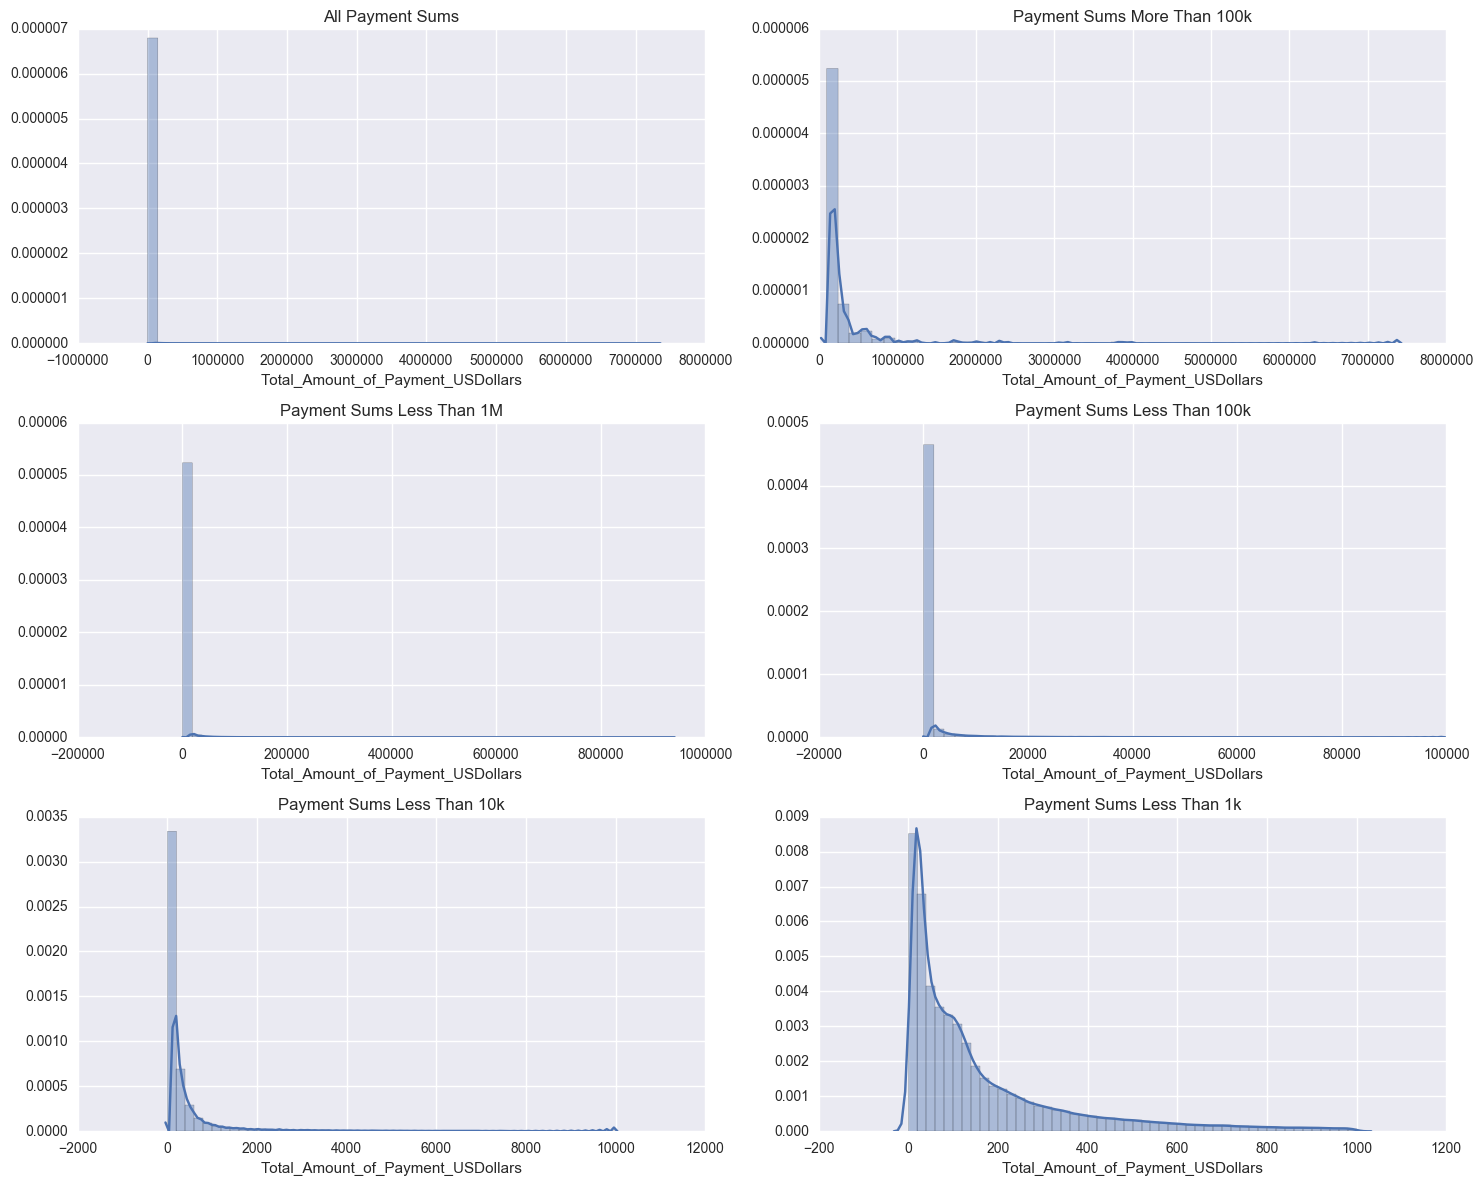

In [15]:
# top_payments.plot(kind='bar')
plt.subplot(3,2,1)
sns.distplot(top_payments.Total_Amount_of_Payment_USDollars)
sns.plt.title('All Payment Sums')
sns.plt.gcf().set_size_inches(15,12)

plt.subplot(3,2,2)
sns.distplot(top_payments[top_payments.Total_Amount_of_Payment_USDollars > int(1e5)].Total_Amount_of_Payment_USDollars)
sns.plt.title('Payment Sums More Than 100k')

plt.subplot(3,2,3)
sns.distplot(top_payments[top_payments.Total_Amount_of_Payment_USDollars < int(1e6)].Total_Amount_of_Payment_USDollars)
sns.plt.title('Payment Sums Less Than 1M')

plt.subplot(3,2,4)
sns.distplot(top_payments[top_payments.Total_Amount_of_Payment_USDollars < int(1e5)].Total_Amount_of_Payment_USDollars)
sns.plt.title('Payment Sums Less Than 100k')

plt.subplot(3,2,5)
sns.distplot(top_payments[top_payments.Total_Amount_of_Payment_USDollars < int(1e4)].Total_Amount_of_Payment_USDollars)
sns.plt.title('Payment Sums Less Than 10k')

plt.subplot(3,2,6)
sns.distplot(top_payments[top_payments.Total_Amount_of_Payment_USDollars < int(1e3)].Total_Amount_of_Payment_USDollars)
sns.plt.title('Payment Sums Less Than 1k')

plt.tight_layout()

From the above plots we can see that the vast majority of doctor's recieved total payments less than $200 in 2013. But there are some serious outliers. The doctors making seven figures are severly skewing the distribution.

## How many doctor's were paid more than 1 Million dollars by medical companies in 2013?

In [17]:
top_payments.columns = ['total']
top_earners = top_payments[top_payments.total > int(1e6)]

print("{0} Physicians were paid more than $1 Million in 2013 by drug manufacturers".format(
        len(top_earners)))

33 Physicians were paid more than $1 Million in 2013 by drug manufacturers


## How was that money paid out?

In [18]:
df[df.Physician_Profile_ID.isin(top_earners.index)].Form_of_Payment_or_Transfer_of_Value.value_counts()

Cash or cash equivalent                                 632
In-kind items and services                              416
Dividend, profit or other return on investment            4
Stock, stock option, or any other ownership interest      2
Name: Form_of_Payment_or_Transfer_of_Value, dtype: int64

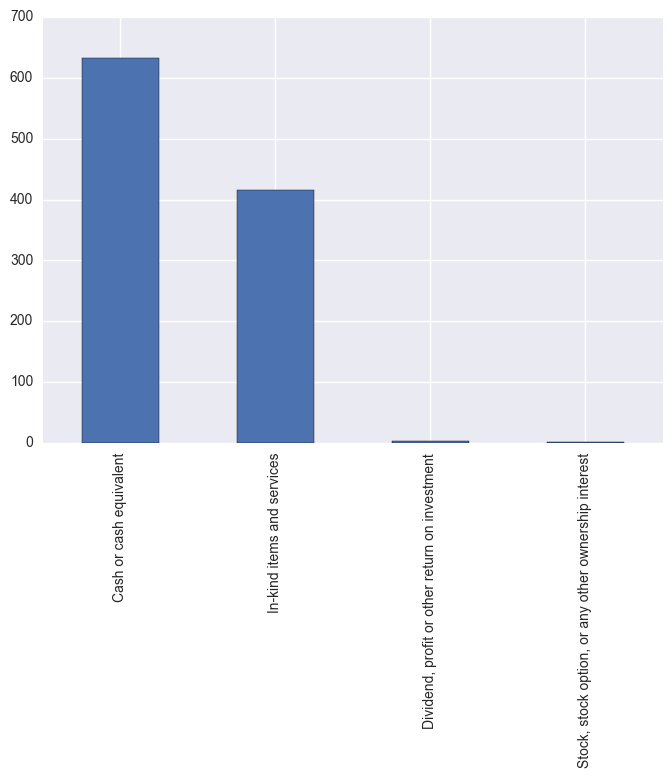

In [19]:
df[df.Physician_Profile_ID.isin(top_earners.index)
  ].Form_of_Payment_or_Transfer_of_Value.value_counts().plot(kind='bar')

Most of the payments to top earners were in the form of cash, let's see what the dollar amounts are for each of these categories



In [20]:
df[df.Physician_Profile_ID.isin(top_earners.index)].groupby(
    'Form_of_Payment_or_Transfer_of_Value').agg({'Total_Amount_of_Payment_USDollars': 'sum'})

,Total_Amount_of_Payment_USDollars
Form_of_Payment_or_Transfer_of_Value,
Cash or cash equivalent,69823799.42
"Dividend, profit or other return on investment",3173542.16
In-kind items and services,129106.55
"Stock, stock option, or any other ownership interest",3554948.52


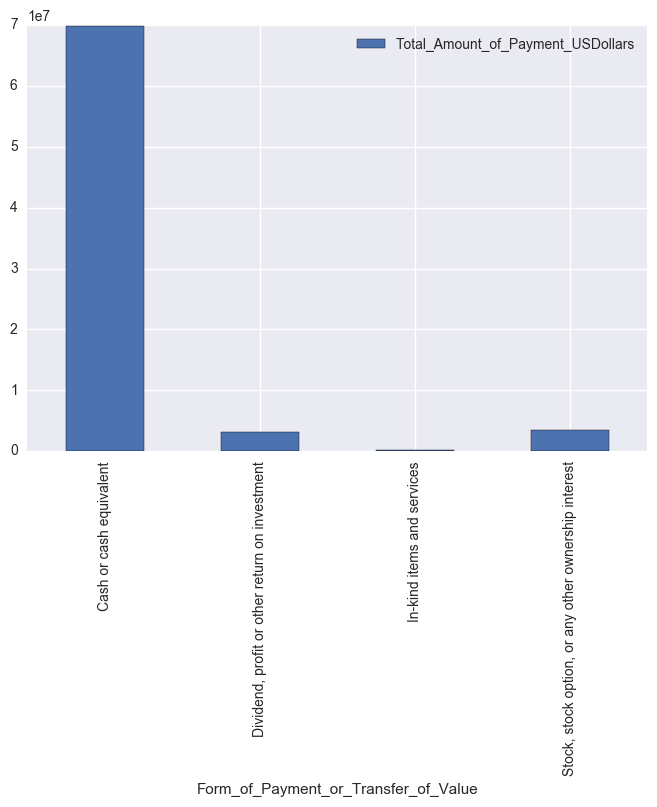

In [21]:
df[df.Physician_Profile_ID.isin(top_earners.index)].groupby(
    'Form_of_Payment_or_Transfer_of_Value').agg({'Total_Amount_of_Payment_USDollars': 'sum'}).plot(kind='bar')

In dollar terms, the vast majority of the money that the top earners took in was in the form of cash.

## What were the nature of the payments made to top earners?

In [83]:
df[df.Physician_Profile_ID.isin(top_earners.index)].groupby(
    'Nature_of_Payment_or_Transfer_of_Value').agg({'Total_Amount_of_Payment_USDollars': 'sum'})

,Total_Amount_of_Payment_USDollars
Nature_of_Payment_or_Transfer_of_Value,
"Compensation for services other than consulting, including serving as faculty or as a speaker at a venue other than a continuing education program",9654021.50
Compensation for serving as faculty or as a speaker for a non-accredited and noncertified continuing education program,1000.00
Consulting Fee,993076.77
Education,5365.57
Food and Beverage,23551.26
Gift,46288.26
Honoraria,13532.50
Royalty or License,65796038.07
Travel and Lodging,148522.72


So these 33 physicians took home almost 10 Million for speaking events and over 65 Million from royalties and licensing. So the majority of this money is from the discoveries and medical inventions these physicians have come up with.

## What companies paid this money out?

In [91]:
df[df.Physician_Profile_ID.isin(top_earners.index)
                ].Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name.value_counts()[:10]

Smith & Nephew, Inc.                 183
DePuy Synthes Sales Inc.              81
DePuy Orthopaedics Inc.               77
Arthrex, Inc.                         70
Tulsa Dental Products LLC             55
Medtronic Sofamor Danek USA, Inc.     51
Lanx, Inc.                            48
Stryker Corporation                   36
NUVASIVE, INC.                        33
The Spectranetics Corporation         27
Name: Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name, dtype: int64

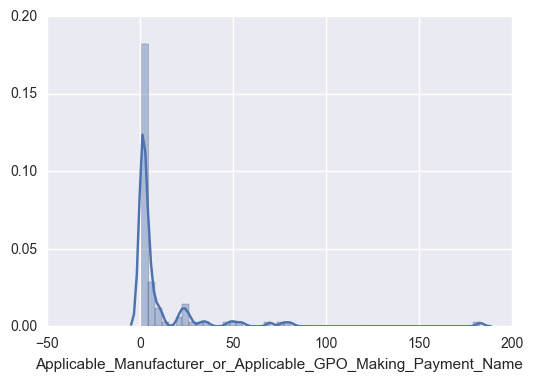

In [89]:
sns.distplot(df[df.Physician_Profile_ID.isin(top_earners.index)
                ].Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name.value_counts())

The manufacturers follow a similar distribution to the sum total of monies paid out. The vast majority of companies here paid less than 20 times, but there are some considerable outliers.

In [22]:
df[df.Physician_Profile_ID.isin(top_earners.index)].groupby(
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name').agg(
                                {'Total_Amount_of_Payment_USDollars': 'sum'}).sort_values(
                                                'Total_Amount_of_Payment_USDollars', ascending=False)[:10]

,Total_Amount_of_Payment_USDollars
Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name,
DePuy Synthes Products LLC,17032969.05
"Arthrex, Inc.",9766068.10
Allergan Inc.,8562148.99
"Medtronic Sofamor Danek USA, Inc.",6906102.81
"Smith & Nephew, Inc.",4693749.47
MAKO Surgical Corp.,4534719.18
Dentsply International,3211396.95
Evalve Inc.,3173542.16
Cook Incorporated,2307874.16


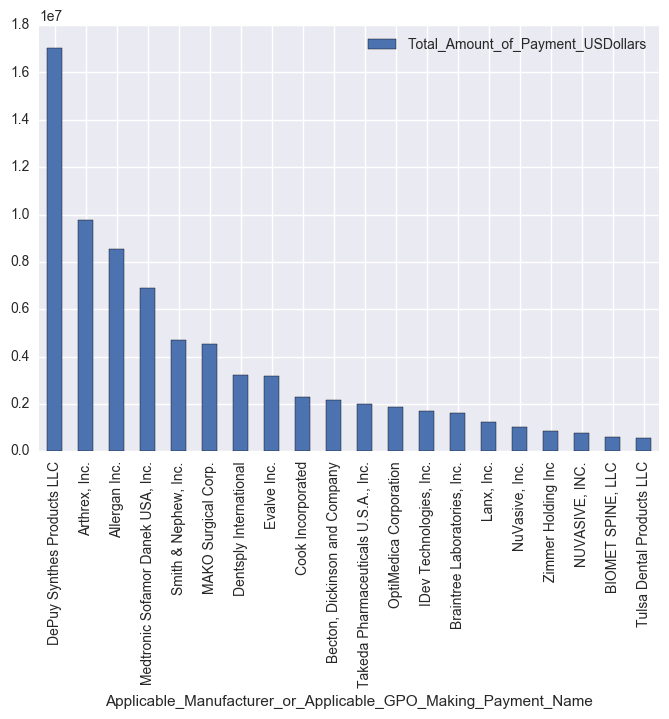

In [24]:
df[df.Physician_Profile_ID.isin(top_earners.index)].groupby(
    'Applicable_Manufacturer_or_Applicable_GPO_Making_Payment_Name').agg(
                                {'Total_Amount_of_Payment_USDollars': 'sum'}).sort_values(
                                                'Total_Amount_of_Payment_USDollars', ascending=False)[:20].plot(kind='bar')

# How do all payments trend over the year?

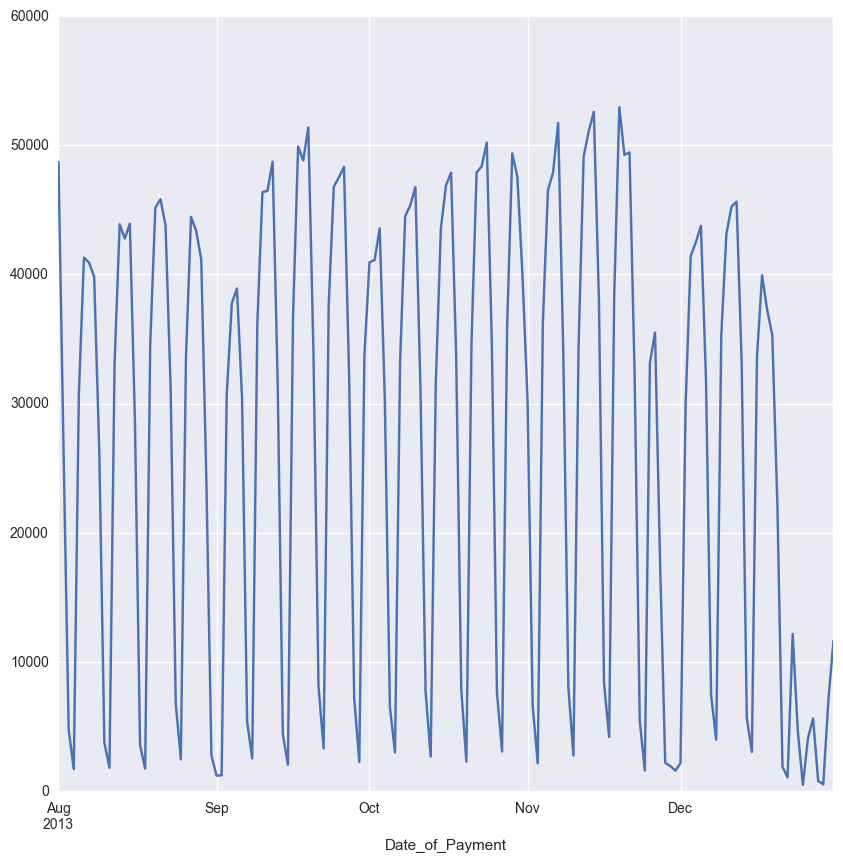

In [102]:
df.groupby('Date_of_Payment').count()['Change_Type'].plot(figsize=(10,10))

The payments appear cyclical, likely to be larger on the weekdays and not many on the weekends.

Also there seems to only be payment data from August onward, so this only counts less than half of 2013

## What days of the week are payments typically made?

In [25]:
df['day_of_week'] = df.Date_of_Payment.dt.weekday_name


grouped = df.groupby('day_of_week').count()
grouped.index = pd.CategoricalIndex(grouped.index, 
                                    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
                                                    

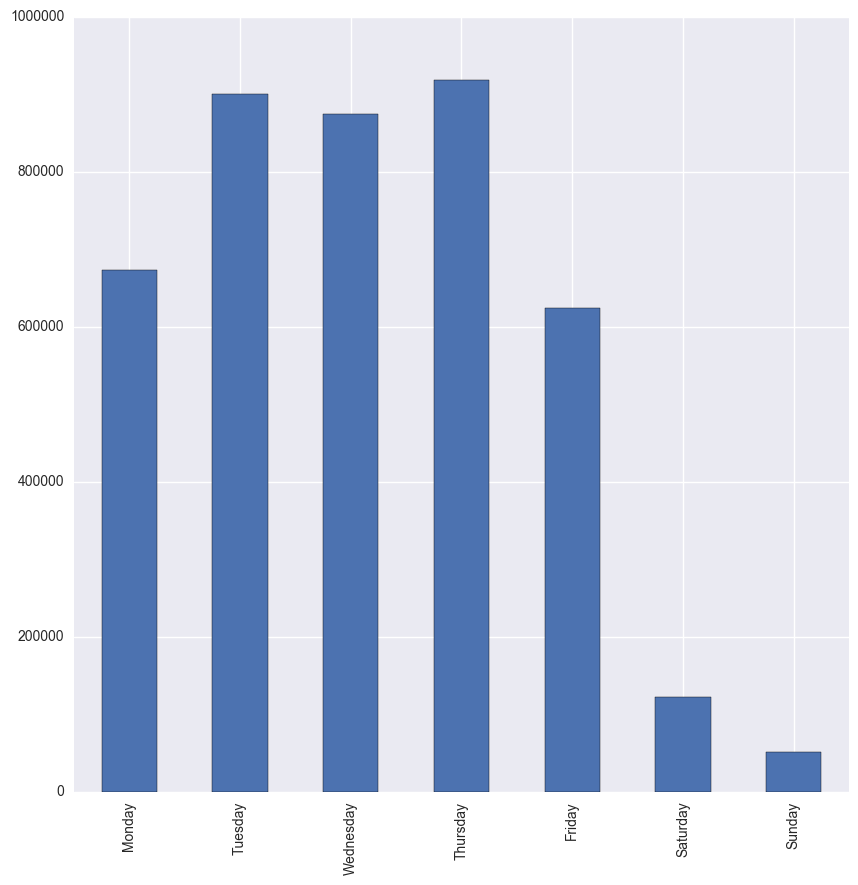

In [26]:
grouped.sort()['Change_Type'].plot(kind='bar', figsize=(10,10))

# How have payment amounts trended over the year?

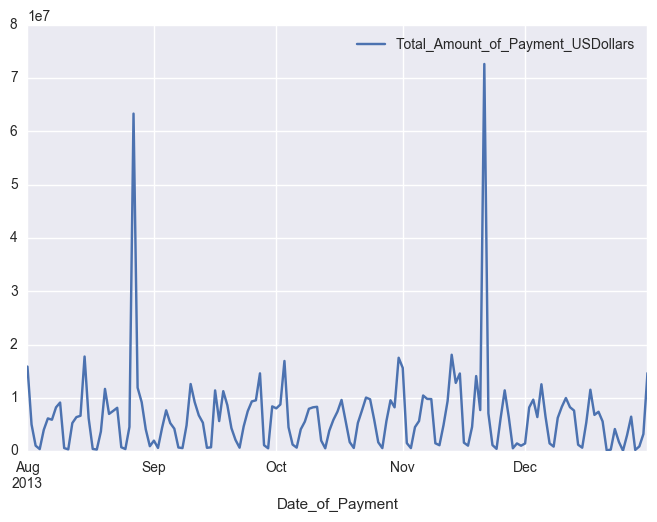

In [27]:
df.groupby('Date_of_Payment').agg({'Total_Amount_of_Payment_USDollars': 'sum'}).plot()

In [28]:
df.groupby('Date_of_Payment').agg({'Total_Amount_of_Payment_USDollars': 'sum'}
                                 ).sort_values('Total_Amount_of_Payment_USDollars', ascending=False).head(2)

,Total_Amount_of_Payment_USDollars
Date_of_Payment,
2013-11-21,72661485.62
2013-08-27,63345469.87


Payment totals follow similar cyclical trends much like the number of payments made each day. Except for two large spikes in the data on November 21st and August 27th. 

## Which days of the week are payment totals the largest?

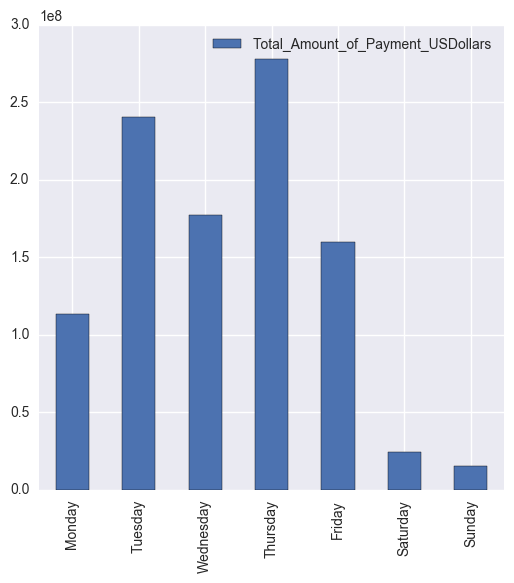

In [29]:
grouped = df.groupby('day_of_week').agg({'Total_Amount_of_Payment_USDollars': 'sum'})
grouped.index = pd.CategoricalIndex(grouped.index, 
                                    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])


grouped.sort().plot(kind='bar', figsize=(6,6))

# Conclusions and further questions

In conclusion, a lot of money was paid out to doctors by medical companies in 2013. Most of this money was paid in small increments, less than $200. Some physicians were paid millions by medical companies, and most of that was paid out as royalties or for speaking fees.

For further exploration I would like to look at the prescription rates of these doctors, especially with drugs that are manufactured by companies which pay them. I would like to test if there is a significant difference in prescription rates for those drugs.